In [88]:
# 1.По сути взять вектора с домашки предыдущей
# 2.создать классификатор
# 3.создать генератор векторов
# 4.обучить модель
# 5.проверить MSE на выходных данных и ожидаемых

In [8]:
#Импортируем нужные библиотеки:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import linear_model
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from pandas import DataFrame
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [9]:
# Загружаем набор данных Ирисы:
iris = datasets.load_iris()
# Смотрим на названия переменных
print(iris.feature_names)
# Смотрим на данные, выводим 10 первых строк:
print(iris.data[:10])
# Смотрим на целевую переменную:
print(iris.target_names)
print(iris.target)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [10]:
iris_frame = DataFrame(iris.data)
# Делаем имена колонок такие же, как имена переменных:
iris_frame.columns = iris.feature_names
# Добавляем столбец с целевой переменной:
iris_frame['target'] = iris.target
# Для наглядности добавляем столбец с сортами:
iris_frame['name'] = iris_frame.target.apply(lambda x : iris.target_names[x])
# Смотрим, что получилось:
iris_frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


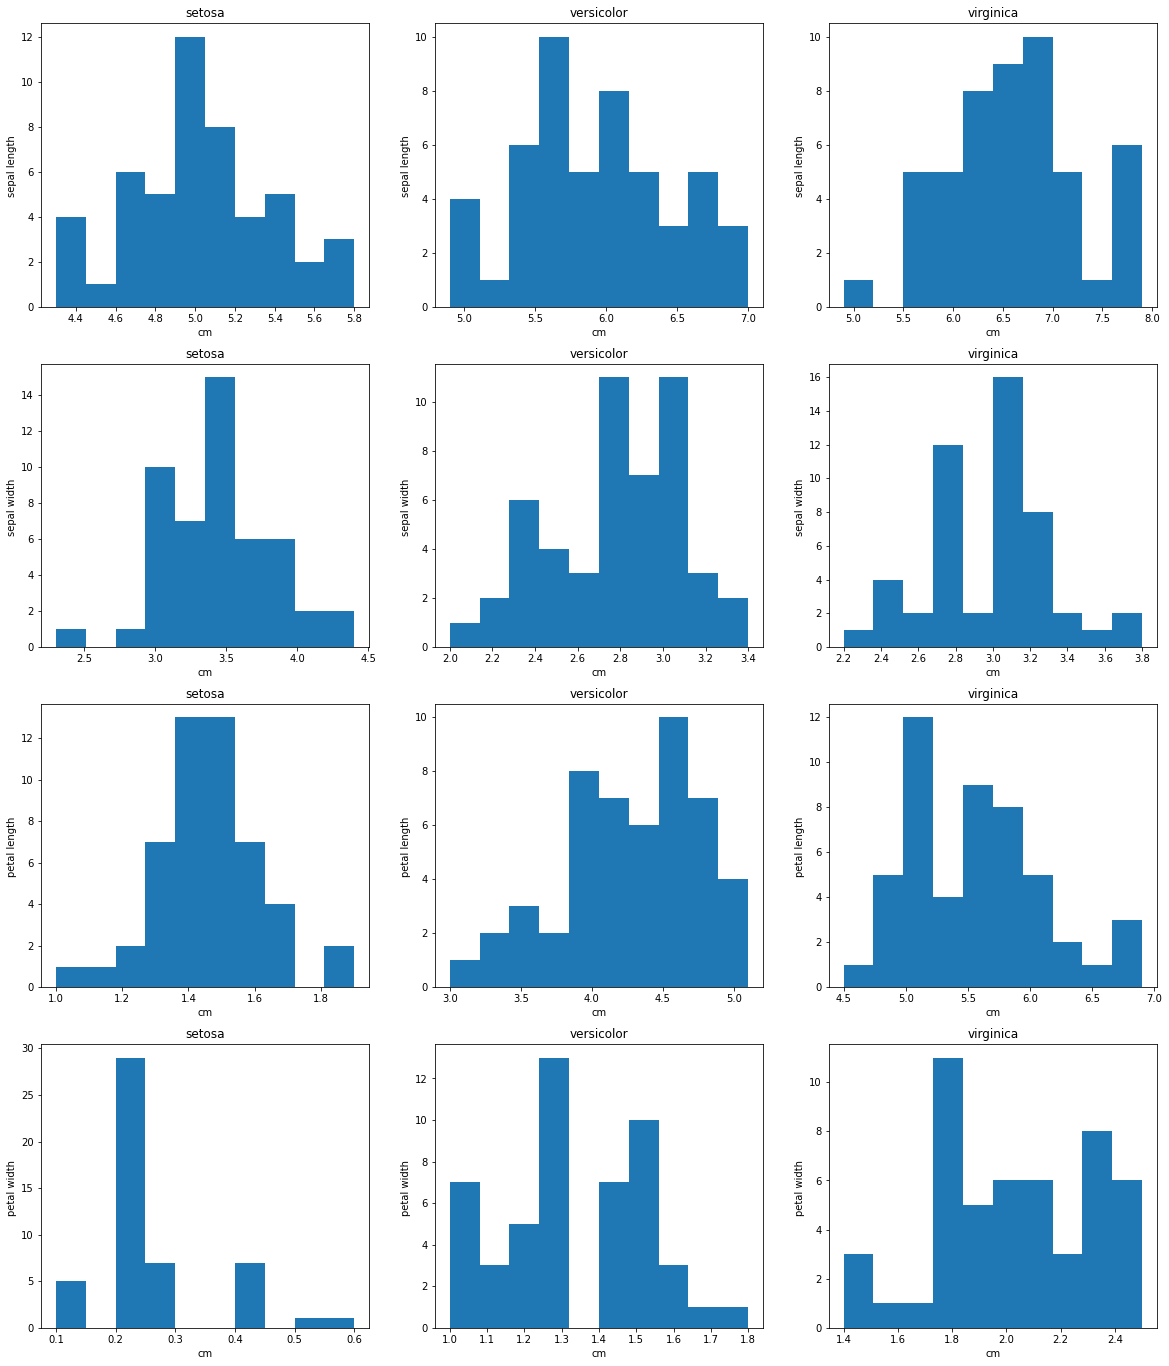

In [13]:
from IPython.core.pylabtools import figsize
# Строим гистограммы по каждому признаку:
from matplotlib import pyplot

pyplot.figure(figsize(20, 24))
plot_number = 0
for feature_name in iris['feature_names']:
   for target_name in iris['target_names']:
      plot_number += 1
      pyplot.subplot(4, 3, plot_number)
      pyplot.hist(iris_frame[iris_frame.name == target_name][feature_name])
      pyplot.title(target_name)
      pyplot.xlabel('cm')
      pyplot.ylabel(feature_name[:-4])

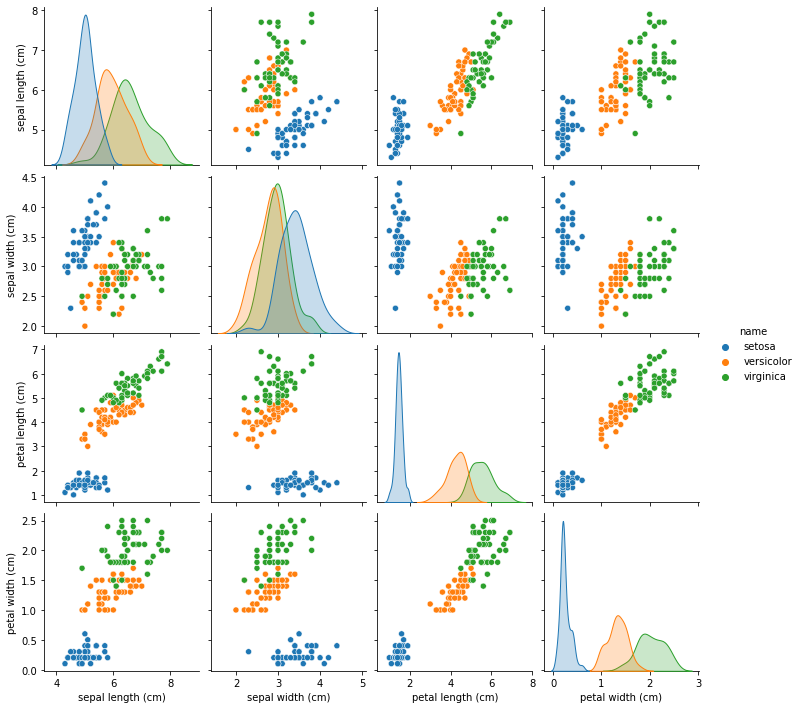

In [14]:
import seaborn as sns
sns.pairplot(iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','name']], hue = 'name')

In [15]:
iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']].corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


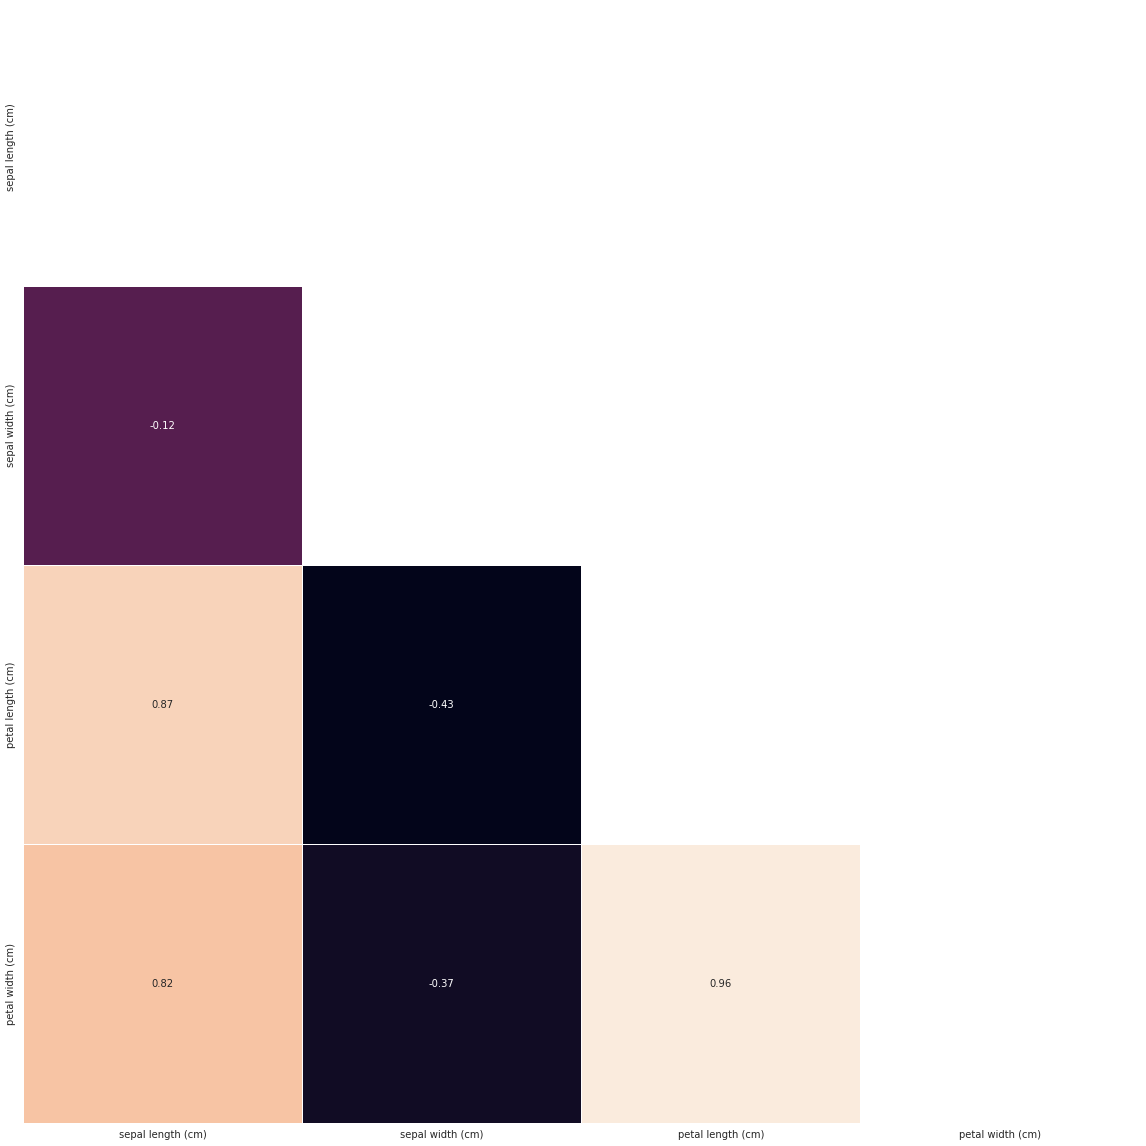

In [16]:
import seaborn as sns
corr = iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
   ax = sns.heatmap(corr, mask=mask, square=True, cbar=False, annot=True, linewidths=.5)

In [17]:
train_data, test_data, train_labels, test_labels = train_test_split(iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']], iris_frame['target'], test_size = 0.3, random_state = 0)
# визуально проверяем, что получившееся разбиение соответствует нашим ожиданиям:
print(train_data)
print(test_data)
print(train_labels)
print(test_labels)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
60                 5.0               2.0                3.5               1.0
116                6.5               3.0                5.5               1.8
144                6.7               3.3                5.7               2.5
119                6.0               2.2                5.0               1.5
108                6.7               2.5                5.8               1.8
..                 ...               ...                ...               ...
9                  4.9               3.1                1.5               0.1
103                6.3               2.9                5.6               1.8
67                 5.8               2.7                4.1               1.0
117                7.7               3.8                6.7               2.2
47                 4.6               3.2                1.4               0.2

[105 rows x 4 columns]
     sepal length (cm)  sepal width (cm)

In [20]:
from scipy import stats
fit_output = stats.linregress(iris_frame[['petal length (cm)','petal width (cm)']])
slope, intercept, r_value, p_value, slope_std_error = fit_output
print(slope, intercept, r_value, p_value, slope_std_error)

0.4157554163524115 -0.36307552131902887 0.9628654314027965 4.6750039073244384e-86 0.009582435790766196


In [35]:
train_data, test_data, train_labels, test_labels = train_test_split(iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']], iris_frame[['target']], test_size = 0.3, random_state = 0)
model = linear_model.SGDClassifier(alpha=0.001, max_iter=1000, random_state = 0)
model.fit(train_data, train_labels)
model_predictions = model.predict(test_data)
print(metrics.accuracy_score(test_labels, model_predictions))
print(metrics.classification_report(test_labels, model_predictions))
pyplot.show()

0.8444444444444444
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.72      1.00      0.84        18
           2       1.00      0.36      0.53        11

    accuracy                           0.84        45
   macro avg       0.91      0.79      0.79        45
weighted avg       0.89      0.84      0.82        45



c:\coding\neural-networks-labs\venv\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
from sklearn.model_selection import cross_val_score

train_data, test_data, train_labels, test_labels = train_test_split(iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']], iris_frame['target'], test_size = 0.3)
model = linear_model.SGDClassifier(alpha=0.0009, max_iter=185, random_state = 0)
scores = cross_val_score(model, train_data, train_labels, cv=10)
print(scores.mean())

0.9045454545454547


In [61]:
train_data, test_data, train_labels, test_labels = train_test_split(iris_frame[['petal length (cm)','petal width (cm)']], iris_frame['target'], test_size = 0.3)
model = linear_model.SGDClassifier(alpha=0.0009, max_iter=185, random_state = 0)
scores = cross_val_score(model, train_data, train_labels, cv=10)
print(scores.mean())

0.9145454545454547


In [83]:
train_data, test_data, train_labels, test_labels = train_test_split(iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']], iris_frame[['target']], test_size = 0.3)
model = KMeans(n_clusters=3)
model.fit(train_data)
model_predictions = model.predict(test_data)
print(metrics.accuracy_score(test_labels, model_predictions))
print(metrics.classification_report(test_labels, model_predictions))

0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.87      0.93      0.90        14
           2       0.94      0.88      0.91        17

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45



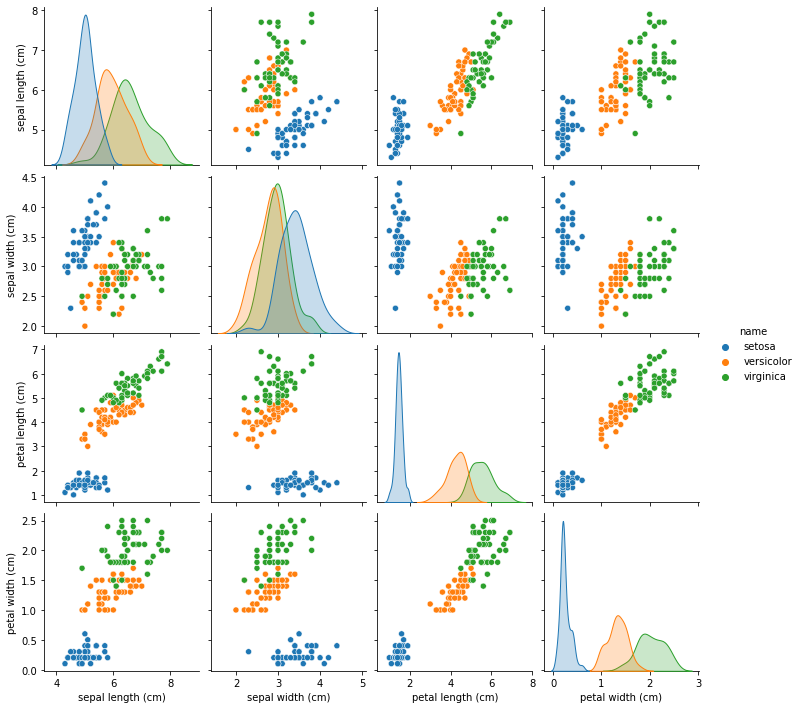

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','name']], hue = 'name')